## Introduzione Python e Finanza 

Negli ultimi anni Python si è dimostrato essere uno dei linguaggi di programmazione più aprezzati dalla community dei developers. Il numero di sviluppatori che lo utilizzano attivamente è cresciuto vertiginosamente, così come il numero di applicazione sviluppate e rilasciate. Ma qual è il successo dietro Python?

In poche parole: i <b>Big Data</b>. Secondo un vecchio articolo della rivista Forbes tra il 2013 e il 2015 abbiamo prodotto più dati che in tutta la storia dell’umanità fino ad allora, e varie stime indicano che nel 2020 ci saranno circa 44 zettabyte di dati che circoleranno per il globo (440 miliardi di gigabyte).

Per questo Python risulta essere uno strumento ottimale in ambito finanziario, ci aiuta a gestire tutti questi dati, e grazie alle nuove tecnologie di machine learning sarà possibile costruire modelli sempre più accurati. 



### Importare le librerie e i dati storici

Iniziamo importando due delle principali librerie per Python:
    - pandas (ci servirà per importare e manipolare i dati)
    - numpy (ci permette di effettuare calcoli tra vettori e matrici)

In [1]:
import pandas as pd
import numpy as np

Ok, ora possiamo importare i dati storici. Per importare le serie storiche ci sono varie soluzioni, che dipendono essenzialmente dal formato in cui sono salvati i nostri dati. In questo caso sono archiviati in un file .csv, simile ai file excel. In questo caso è sufficiente utilizzare la libreria pandas (as pd) e il metodo in essa contenuto read_csv, specificando all'interno il percorso dove è storato il file.


Importiamo il file AAPL.csv relativo ai dati del titolo Apple:

In [2]:
AAPL = pd.read_csv('D:/Anaconda/AAPL.csv')

### Visualizzare i dati 

Ok ora utilizziamo la funzione head() per vedere le prime 5 righe del nostro dataset:

In [9]:
AAPL.head()

0    223.970001
1    224.589996
2    218.960007
3    220.820007
4    227.009995
Name: Adj Close, dtype: float64

Come possiamo vedere abbiamo 7 colonne: 'Date','Open', 'High'...
A noi interessa principalmente la colonna 'Adj Close', che ci servirà per calcolare le variazioni giornaliere, dalle quali ricaveremo il ritorno atteso e il rischio, identificato nella varianza
    

Visualizziamo il grafico dei prezzi di chiusura nell'ultimo anno:

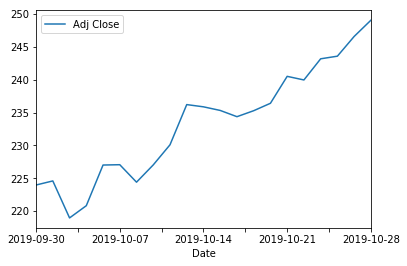

In [5]:
import matplotlib.pyplot as plt

AAPL.plot(x='Date', y='Adj Close',)
plt.show()

Estraiamo la colonna del prezzo di chiusura:

In [6]:
AAPL = AAPL['Adj Close']

Come vediamo utilizzando la funzione head() nel database AAPL solo la colonna della chiusura aggiustata:

In [8]:
AAPL.head()

0    223.970001
1    224.589996
2    218.960007
3    220.820007
4    227.009995
Name: Adj Close, dtype: float64

In [11]:
'''
AMZN = pd.read_csv('D:/Anaconda/AMZN.csv')
FB = pd.read_csv('D:/Anaconda/FB.csv')
GOOG = pd.read_csv('D:/Anaconda/GOOG.csv')
MSFT = pd.read_csv('D:/Anaconda/MSFT.csv')
NFLX = pd.read_csv('D:/Anaconda/NFLX.csv')
NIO = pd.read_csv('D:/Anaconda/NIO.csv')
PCG = pd.read_csv('D:/Anaconda/PCG.csv')
SPOT = pd.read_csv('D:/Anaconda/SPOT.csv')
TIF = pd.read_csv('D:/Anaconda/TIF.csv')
TSLA = pd.read_csv('D:/Anaconda/TSLA.csv')'''
'''
AMZN = AMZN['Adj Close']
FB = FB['Adj Close']
GOOG = GOOG['Adj Close']
MSFT = MSFT['Adj Close']
NFLX = NFLX['Adj Close']
NIO = NIO['Adj Close']
PCG = PCG['Adj Close']
SPOT = SPOT['Adj Close']
TIF = TIF['Adj Close']
TSLA = TSLA['Adj Close']'''

stocks = ['AAPL', 'AMZN', 'FB','GOOGL', 'MSFT', 'NFLX', 'NIO','PCG','SPOT', 'TIF', 'TSLA']

In [12]:
df = pd.concat([AAPL, 
                AMZN, 
                FB,
                GOOG,
                MSFT,
                NFLX,
                NIO,
                PCG,
                SPOT,
                TIF,
                TSLA,
                ], axis=1)

In [13]:
df.head()

,Adj Close,Adj Close,Adj Close,Adj Close,Adj Close,Adj Close,Adj Close,Adj Close,Adj Close,Adj Close,Adj Close
0,223.970001,1735.910034,178.080002,1219.000000,139.029999,267.619995,1.56,10.00,114.000000,92.629997,240.869995
1,224.589996,1735.650024,175.809998,1205.099976,137.070007,269.579987,1.32,9.90,112.519997,90.879997,244.690002
2,218.960007,1713.229980,174.600006,1176.630005,134.649994,268.029999,1.59,8.96,113.900002,88.599998,243.130005
3,220.820007,1724.420044,179.380005,1187.829956,136.279999,268.149994,1.64,9.55,114.820000,89.190002,233.029999
4,227.009995,1739.650024,180.449997,1209.000000,138.119995,272.790009,1.62,10.87,116.419998,88.059998,231.429993


In [14]:
df.columns = ['AAPL', 'AMZN', 'FB','GOOGL', 'MSFT', 'NFLX', 'NIO','PCG','SPOT', 'TIF', 'TSLA']

In [15]:
df.head()

,AAPL,AMZN,FB,GOOGL,MSFT,NFLX,NIO,PCG,SPOT,TIF,TSLA
0,223.970001,1735.910034,178.080002,1219.000000,139.029999,267.619995,1.56,10.00,114.000000,92.629997,240.869995
1,224.589996,1735.650024,175.809998,1205.099976,137.070007,269.579987,1.32,9.90,112.519997,90.879997,244.690002
2,218.960007,1713.229980,174.600006,1176.630005,134.649994,268.029999,1.59,8.96,113.900002,88.599998,243.130005
3,220.820007,1724.420044,179.380005,1187.829956,136.279999,268.149994,1.64,9.55,114.820000,89.190002,233.029999
4,227.009995,1739.650024,180.449997,1209.000000,138.119995,272.790009,1.62,10.87,116.419998,88.059998,231.429993


In [32]:
returns = df.pct_change()
returns.head()

,AAPL,AMZN,FB,GOOGL,MSFT,NFLX,NIO,PCG,SPOT,TIF,TSLA
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.002768,-0.000150,-0.012747,-0.011403,-0.014098,0.007324,-0.153846,-0.010000,-0.012982,-0.018892,0.015859
2,-0.025068,-0.012917,-0.006882,-0.023625,-0.017655,-0.005750,0.204545,-0.094949,0.012265,-0.025088,-0.006375
3,0.008495,0.006532,0.027377,0.009519,0.012105,0.000448,0.031447,0.065848,0.008077,0.006659,-0.041542
4,0.028032,0.008832,0.005965,0.017822,0.013502,0.017304,-0.012195,0.138220,0.013935,-0.012670,-0.006866


In [33]:
returns.tail()

,AAPL,AMZN,FB,GOOGL,MSFT,NFLX,NIO,PCG,SPOT,TIF,TSLA
16,-0.002287,-0.011161,-0.039102,-0.002688,-0.014881,-0.040856,-0.065089,0.007463,-0.008319,0.015519,0.008205
17,0.013419,-0.002016,0.020895,0.013140,0.006380,0.017173,-0.031646,0.012346,0.001864,0.016161,-0.003521
18,0.001645,0.010561,0.001236,0.001477,0.019674,0.000848,0.006536,-0.121951,0.005075,0.056692,0.176692
19,0.012316,-0.010922,0.008102,0.003283,0.005645,0.019595,-0.019481,-0.305556,0.015653,0.009010,0.094935
20,0.010017,0.008942,0.008037,0.019658,0.024586,0.018207,-0.019868,-0.240000,0.161654,0.316286,-0.001280


In [17]:
mean_daily_returns = returns.mean()
cov_matrix = returns.cov()

In [18]:
num_portfolios = 100000

In [30]:
print(mean_daily_returns)

AAPL     0.005393
AMZN     0.001223
FB       0.003229
GOOGL    0.002897
MSFT     0.001905
NFLX     0.002857
NIO     -0.000004
PCG     -0.039602
SPOT     0.011051
TIF      0.019157
TSLA     0.016443
dtype: float64


In [31]:
print(cov_matrix)

           AAPL      AMZN        FB     GOOGL      MSFT      NFLX       NIO  \
AAPL   0.000152  0.000057  0.000096  0.000091  0.000090  0.000102 -0.000311   
AMZN   0.000057  0.000107  0.000127  0.000081  0.000099  0.000102 -0.000113   
FB     0.000096  0.000127  0.000300  0.000122  0.000157  0.000211  0.000194   
GOOGL  0.000091  0.000081  0.000122  0.000130  0.000120  0.000096 -0.000301   
MSFT   0.000090  0.000099  0.000157  0.000120  0.000171  0.000129 -0.000095   
NFLX   0.000102  0.000102  0.000211  0.000096  0.000129  0.000544 -0.000391   
NIO   -0.000311 -0.000113  0.000194 -0.000301 -0.000095 -0.000391  0.005693   
PCG    0.000155  0.000294  0.000188  0.000080 -0.000268 -0.000933  0.000373   
SPOT   0.000093  0.000146  0.000219  0.000198  0.000274  0.000228  0.000371   
TIF    0.000183  0.000248  0.000244  0.000383  0.000537  0.000352 -0.000625   
TSLA  -0.000034  0.000023 -0.000071 -0.000032  0.000144  0.000119 -0.000532   

            PCG      SPOT       TIF      TSLA  
AAP

In [21]:
results = np.zeros((4+len(stocks)-1,num_portfolios))

In [22]:
for i in range(num_portfolios):
    weights = np.array(np.random.uniform(-0.25,0.25,11))
    
    #calculate portfolio return and volatility
    portfolio_return = np.sum(mean_daily_returns * weights) * 252
    portfolio_std_dev = np.sqrt(np.dot(weights.T,np.dot(cov_matrix, weights))) * np.sqrt(252)
    
    #store results in results array
    results[0,i] = portfolio_return
    results[1,i] = portfolio_std_dev
    #store Sharpe Ratio (return / volatility) - risk free rate element excluded for simplicity
    results[2,i] = results[0,i] / results[1,i]
    
    for j in range(len(weights)):
        results[j+3,i] = weights[j]

In [23]:
results_frame = pd.DataFrame(results.T,columns=['ret','stdev','sharpe',stocks[0],stocks[1],stocks[2],stocks[3],stocks[4],stocks[5],stocks[6],stocks[7],stocks[8], stocks[9], stocks[10]])

In [24]:
import matplotlib.pyplot as plt

No handles with labels found to put in legend.


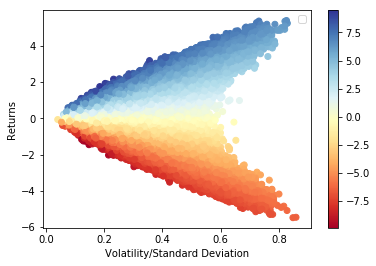

In [25]:
plt.xlabel('Volatility/Standard Deviation')
plt.ylabel('Returns')
plt.legend()
plt.scatter(results_frame.stdev, results_frame.ret, c=results_frame.sharpe, cmap='RdYlBu')
plt.colorbar()

In [26]:
max_sharpe_portfolio = results_frame.loc[results_frame['sharpe'].idxmax()]

max_return_portfolio = results_frame.loc[results_frame['ret'].idxmax()]

min_std_portfolio = results_frame.loc[results_frame['stdev'].idxmin()]

In [27]:
print(max_return_portfolio)

ret       5.391486
stdev     0.826379
sharpe    6.524225
AAPL      0.034810
AMZN     -0.003125
FB        0.217493
GOOGL     0.110311
MSFT      0.090294
NFLX      0.014413
NIO       0.220386
PCG      -0.249099
SPOT      0.230506
TIF       0.249628
TSLA      0.169217
Name: 45404, dtype: float64


In [28]:
print(max_sharpe_portfolio)

ret       1.922385
stdev     0.203088
sharpe    9.465781
AAPL      0.214892
AMZN     -0.104828
FB        0.139022
GOOGL     0.184372
MSFT     -0.113862
NFLX     -0.112829
NIO       0.024069
PCG      -0.051897
SPOT      0.102994
TIF      -0.040429
TSLA      0.227173
Name: 28847, dtype: float64


In [29]:
print(min_std_portfolio)

ret      -0.070868
stdev     0.040079
sharpe   -1.768201
AAPL     -0.065937
AMZN      0.212083
FB        0.044565
GOOGL     0.141056
MSFT     -0.164241
NFLX     -0.018275
NIO       0.020150
PCG       0.000572
SPOT     -0.140567
TIF       0.055378
TSLA      0.008688
Name: 61010, dtype: float64


In [34]:
bench = pd.read_csv('D:/Anaconda/S&P500.csv')
bench = bench['Adj Close']

bench_returns = bench.pct_change()
bench_mean_daily_return = bench_returns.mean()
bench_annualized_return = (bench_mean_daily_return * 252)
bench_std = bench_returns.std() * np.sqrt(252)

No handles with labels found to put in legend.


TypeError: You must first set_array for mappable

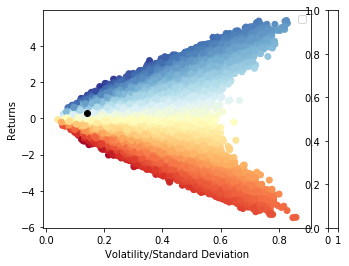

In [39]:
plt.xlabel('Volatility/Standard Deviation')
plt.ylabel('Returns')
plt.legend()
plt.scatter(results_frame.stdev, results_frame.ret, c=results_frame.sharpe, cmap='RdYlBu')
plt.scatter(bench_std, bench_annualized_return,color='k')
plt.colorbar()
plt.show()